# Esercitazione 10
**7  Maggio 2024**

In [35]:
import numpy as np
import numpy.linalg as npl
import scipy.linalg as spl
import scipy as sp
import matplotlib.pyplot as plt
import SolveTriangular

### Codice EquazioniNormali
Implementare la function  **eqnorm(A,b)** che implementa il metodo delle equazioni normali per la soluzione del sistema sovradeterminato Ax=b e che prende in input:
- la matrice A di dimensione $m \times n$ , $m>n$
- il termine noto b di ordine m
restituisce in output
- la soluzione del sistema lineare 

In [36]:
def eqnorm(A,b):
    # G@x = A.T@b
    G = A.T @ A
    b1 = A.T @  b
    #Risolvo Gx = b1 nuovo_termine con Cholesky
    L = spl.cholesky(G, lower=True)
    y,flag = SolveTriangular.Lsolve(L,b1)
    #risolvo Ux = y
    U = L.T
    x, flag = SolveTriangular.Usolve(U,y)
    return x


### Codice QRLS
Implementare la function  **qrLS(A,b)** che utilizza il metodo QR per la soluzione del sistema sovradeterminato Ax=b e che prende in input:
- la matrice A di dimensione $m \times n$ , $m>n$
- il termine noto b di ordine m
restituisce in output
- la soluzione del sistema lineare e la norma 2 al quadrato del residuo.

In [37]:

def qrLS(A,b,n):
    #A rango massimo
    Q,R = spl.qr(A)
    R1 = R[0:n,0:n]
    #risolvo il sistema R1x=h1 dove h1 = Q.T b
    h = Q.T@b 
    x = spl.solve(R1,h[0:n])
    return x

### Codice SVDLS
Implementare la function  **svdLS(A,b)** che utilizza  il metodo SVD per la soluzione del sistema sovradeterminato Ax=b e che prende in input:
- la matrice A di dimensione $m \times n$ , $m>n$
- il termine noto b di ordine m
restituisce in output
- la soluzione del sistema lineare e la norma 2 al quadrato del residuo.

In [38]:

"""
npl.svd spiegazione:
    Una matrice unitaria U: una matrice di dimensioni (m, m) se full_matrices è True, altrimenti di dimensioni (m, min(m, n)).
    Un array contenente i valori singolari s, ordinati in ordine decrescente.
    La trasposizione coniugata della matrice unitaria V: una matrice di dimensioni (n, n) se full_matrices è True, altrimenti di dimensioni (min(m, n), n).
    U e V ortogonali
"""

def svdLS(A,b):
    # A senza rango massimo => esistono U mxm V nxn ortogonale
    # Risolvo il sistema Ʃc = d dove c=V.T x e d = U.T b
    U, sig, VT = np.linalg.svd(A, full_matrices=False)
    
    # Calcola l'inversa del reciproco della matrice diagonale s
    SIG = np.diag(1/sig)
    
    # Calcola la soluzione x tramite la formula pseudoinversa
    x = VT.T @ SIG @ U.T @ b

    # Calcola il residuo
    residual = np.linalg.norm(b - A @ x)**2
    
    return x, residual

## Esercizio 1
- Si utilizzino i tre metodi implementati  per l'approssimazione ai minimi quadrati delle seguenti configurazioni di dati:

$$
\begin{array}{l}
x_1 = [-3.5, \, -3, \, -2, \, -1.5, \, -0.5, \, 0.5, \, 1.7, \, 2.5, \, 3] ;\\
y_1 = [-3.9, \, -4.8, \, -3.3, \, -2.5, \, 0.3, \, 1.8, \, 4, \, 6.9, \, 7.1] ;\\
x_2 = [-3.14, \, -2.4, \, -1.57, \, -0.7, \, -0.3, \, 0, \, 0.4, \, 0.7, \, 1.57] ;\\
y_2 = [0.02, \, -1, \, -0.9, \, -0.72, \, -0.2, \, -0.04, \, 0.65, \, 0.67, \, 1.1] ;\\
x_3 = [[1.001,\, 1.004,\, 1.005,\,1.0012, \,1.0013,  \, 1.0014,  \, 1.0015, \, 1.0016] ;\\
y_3 = [-1.2, \, -0.95, \, -0.9, \, -1.15, \, -1.1, \, -1] ;\\
\end{array}
$$

al variare del grado $n$ tra 1 e 4.



(array([1.21492318, 1.90511021]), 4.954617839084975)


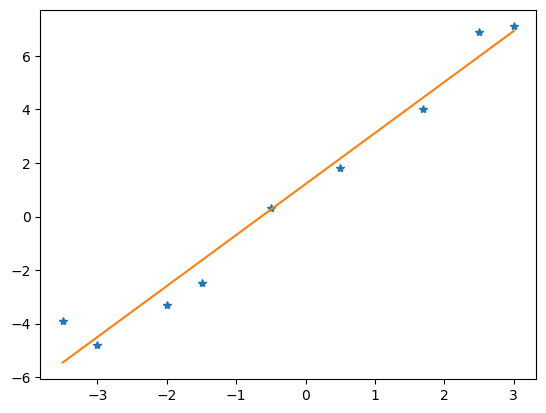

In [39]:
x = np.array([-3.5, -3, -2, -1.5, -0.5, 0.5, 1.7, 2.5, 3])
y = np.array([-3.9, -4.8, -3.3, -2.5, 0.3, 1.8, 4, 6.9, 7.1])

m = x.shape
n = 1 #grado del polinomio di regressione
n1 = n + 1 #gradi di libertà o n umero dei coefficenti del polinomio 
B = np.vander(x, increasing=True)[:,:n1]

a_EQN = eqnorm(B,y)
#print(a_EQN)

a_QR = qrLS(B,y,n1)
#print(a_QR)

a_SV = svdLS(B,y)
print(a_SV)

xv = np.linspace(np.min(x), np.max(x),200)
pol_EQN = np.polyval(np.flip(a_EQN),xv)
plt.plot(x,y,'*',xv,pol_EQN)

## Esercizio 2: 
Per i dati $(x_i, y_i)$ riportati nei seguenti array

$$
\begin{array}{l}
x = [0.0004, \, 0.2507, \, 0.5008, \, 2.0007, \, 8.0013]  ;\\
y = [0.0007, \, 0.0162, \, 0.0288, \, 0.0309, \, 0.0310] ;
\end{array}
$$

- costruire la retta di regressione;
- costruire la parabola approssimante i dati nel senso dei minimi quadrati;

Quale tra le due approssimazioni risulta la migliore? (Confrontare i grafici e la norma euclidea al quadrato del vettore dei residui).



(5, 2)
[[1.0000e+00 4.0000e-04]
 [1.0000e+00 2.5070e-01]
 [1.0000e+00 5.0080e-01]
 [1.0000e+00 2.0007e+00]
 [1.0000e+00 8.0013e+00]]
condizionamento matrice: 4.663457775986457
(5, 3)
[[1.00000000e+00 4.00000000e-04 1.60000000e-07]
 [1.00000000e+00 2.50700000e-01 6.28504900e-02]
 [1.00000000e+00 5.00800000e-01 2.50800640e-01]
 [1.00000000e+00 2.00070000e+00 4.00280049e+00]
 [1.00000000e+00 8.00130000e+00 6.40208017e+01]]
condizionamento matrice: 65.67493525624798


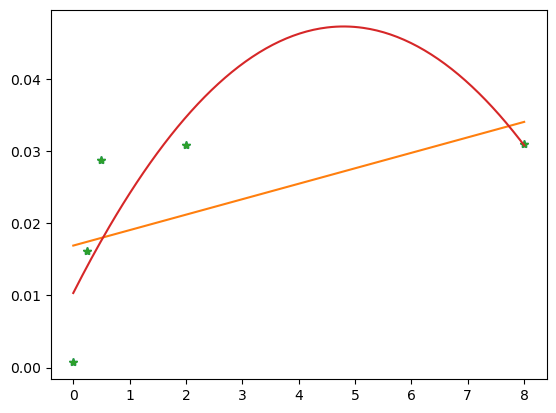

In [40]:
x = np.array([0.0004, 0.2507, 0.5008, 2.0007, 8.0013])
y = np.array([0.0007, 0.0162, 0.0288, 0.0309, 0.0310])

def retta():
    n = 1
    n1 = n + 1
    m = x.shape
    V = np.vander(x,increasing=True)[:, :n1]
    #Risolvo sistema Vx = y
    #Il sistema è sovraderminato
    print(V.shape)
    print(V)

    #cerco di capire il condizionamento matrice
    K = npl.cond(V)
    print("condizionamento matrice:",K)
    #la matrice è ben condizionata perciò posso affidarmi al metodo delle equazioni normali

    def func(A,b):
        #risolvo il sistema Gx = A.T b
        h = A.T@b
        G = A.T @ A
        #G è definita positiva => Gx = h risolvo con Cholesky
        L = npl.cholesky(G)
        y, flag = SolveTriangular.Lsolve(L,h)
        U = L.T
        x, flag = SolveTriangular.Usolve(U,y)
        return x

    coefficenti_pol = func(V,y)

    xv = np.linspace(min(x), max(x), 200)
    yv = np.polyval(np.flip(coefficenti_pol),xv)

    plt.plot(x,y,'*',xv,yv)

def parabola():
    n = 2
    n1 = n + 1
    m = x.shape
    V = np.vander(x,increasing=True)[:, :n1]
    #Risolvo sistema Vx = y
    #Il sistema è sovraderminato
    print(V.shape)
    print(V)

    #cerco di capire il condizionamento matrice
    K = npl.cond(V)
    print("condizionamento matrice:",K)
    #la matrice è ben condizionata perciò posso affidarmi al metodo delle equazioni normali

    def func(A,b):
        #risolvo il sistema Gx = A.T b
        h = A.T@b
        G = A.T @ A
        #G è definita positiva => Gx = h risolvo con Cholesky
        L = npl.cholesky(G)
        y, flag = SolveTriangular.Lsolve(L,h)
        U = L.T
        x, flag = SolveTriangular.Usolve(U,y)
        return x

    coefficenti_pol = func(V,y)

    xv = np.linspace(min(x), max(x), 200)
    yv = np.polyval(np.flip(coefficenti_pol),xv)

    plt.plot(x,y,'*',xv,yv)

retta()
parabola()

#Notiamo dal gradico che ad approssimare meglio la funzione è la parabola cambiando il grado del polinomio a 2 

## Esercizio 3:
Scrivere uno script Python per approssimare la seguente configurazione di punti

$$
\begin{array}{l}
x = [10 \, : \, 0.5/5 \, : \, 10.5] ;\\
y = [11.0320, \, 11.1263, \, 11.1339, \, 11.1339, \, 11.1993, \, 11.1844] ;
\end{array}
$$

mediante un polinomio ai minimi quadrati di grado 4 costruito  con il metodo
delle equazioni normali, con il metodo QRLS e con il metodo SVDLS.
Perturbare poi il secondo punto nel seguente modo
$$x(1) = x(1) + 0.013; \quad y(1) = y(1) - 0.001;$$
e calcolare i polinomi ai minimi quadrati relativi alla
configurazione perturbata. Commentare e motivare i risultati ottenuti.



### Codici per l'interpolazione polinomiale nella forma di Lagrange 

Scrivere la function **interpL** che calcoli
il polinomio interpolante in forma di Lagrange  
Tale function deve assumere come dati in input:
 
 - x vettore dei nodi di interpolazione,
- y vettore dei valori della funzione nei nodi di interpolazione,
- xx vettore dei punti in cui si vuole valutare il polinomio interpolante.
 
In output deve essere restituito yy vettore contenente i valori assunti dal polinomio interpolante.

 
Funzioni Python  utili:
 
-  numpy.poly() restituisce i coefficienti di un polinomio di zeri assegnati,
 - numpy.polyval(p, x)  valuta un polinomio in un punto assegnato.
 

In [41]:
def plagr(xnodi,j):
    """
    Restituisce i coefficienti del k-esimo pol di
    Lagrange associato ai punti del vettore xnodi
    """
    xzeri=np.zeros_like(xnodi)
    n=xnodi.size
    if j==0:
       xzeri=xnodi[1:n]
    else:
       xzeri=np.append(xnodi[0:j],xnodi[j+1:n])
    
    num=np.poly(xzeri) 
    den=np.polyval(num,xnodi[j])
    
    p=num/den
    
    return p


def interpL(x, y, xx):
     """"
        %funzione che determina in un insieme di punti il valore del polinomio
        %interpolante ottenuto dalla formula di Lagrange.
        % DATI INPUT
        %  x  vettore con i nodi dell'interpolazione
        %  f  vettore con i valori dei nodi 
        %  xx vettore con i punti in cui si vuole calcolare il polinomio
        % DATI OUTPUT
        %  y vettore contenente i valori assunti dal polinomio interpolante
        %
     """
     n=x.size
     m=xx.size
     L=np.zeros((m,n))
     for j in range(n):
        p=plagr(x,j)
        L[:,j]=np.polyval(p,xx)
    
    
     return L@y

## Esercizio 1

Realizzare uno script che calcoli nella forma di Lagrange i polinomi che
interpolano le funzioni test $\sin(x)$ e $\cos(x)$ nei punti $x_k = k \pi/2$, con
$k = 0, 1, 2, 3, 4$. Visualizzare graficamente i polinomi ottenuti insieme
alle funzioni assegnate.

[ 0.17227005 -2.14998393  0.61026872  0.22891744]


ValueError: x and y must have same first dimension, but have shapes (200,) and (4,)

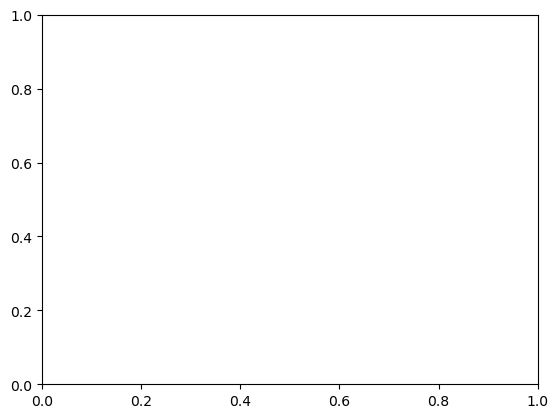

In [81]:
x = np.array([k*3.14/2 for k in range(4)])
y1 = np.sin(x)
y2 = np.cos(x)

def Lj(x, nodi, j):
    num = 1
    for xi in nodi:
        if x != j:
            num = num * (x - xi)
    den = 1
    xj = nodi[j]
    for xi in nodi:
        if xi != xj:
            den = den * (xj - xi)
    return num / den

def build_Lmatrix(nodi):
    n = nodi.size
    L = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            L[i][j] = Lj(i,nodi,j)
    return L
    

L = build_Lmatrix(x)
xv = np.linspace(min(x),max(x),4)
coefficenti_pol = L@y.T
print(coefficenti_pol)
yv = np.polyval(xv,coefficenti_pol)
plt.plot(x,y,'*',xv,yv,'r-')

## Esercizio 2
Realizzare uno script python che interpola le coppie $x_i,y_i$, $i=0,\cdots,3$
dove $x_i,i=0,3$ sono punti equidistanti nell' intervallo [-1,1] e $y_i=f(x_i)$ dove $f(x)=3x^3+2x^2+2x-1$ 

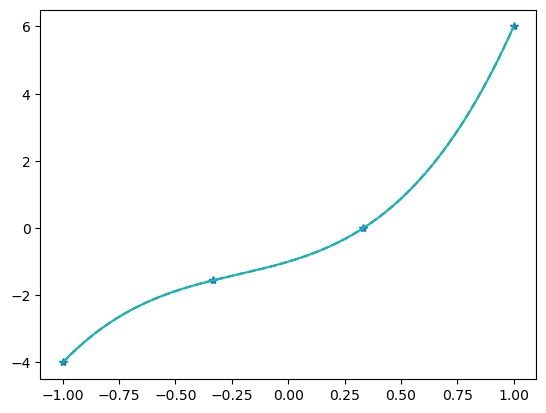

In [42]:
n = 3
x = np.linspace(-1,1,n+1)
f = lambda x: 3*x**3 + 2*x**2 + 2*x - 1
y = f(x)
xv = np.linspace(-1,1,200)
pol_interpL = interpL(x,y,xv)

plt.plot(xv,pol_interpL,'r--',x,y,'*',xv,f(xv),'c-')


## Esercizio 3

La temperatura $T$ in  prossimità  del suolo  subisce una variazione dipendente dalla latitudine $L$ nel seguente modo

L=np.array([-55, -45, -35, -25, -15, -5, 5, 15, 25, 35, 45, 55, 65])

T=np.array([3.7, 3.7,3.52,3.27, 3.2, 3.15, 3.15, 3.25, 3.47, 3.52, 3.65, 3.67, 3.52])


 
- Si vuole costruire un modello che descriva la legge $T = T(L)$ anche per latitudini non misurate. A tal fine si scriva uno script che fornisca la variazione di temperatura alle latitudini $L = \pm 42$ utilizzando il polinomio interpolante. Visualizzare in un grafico i dati assegnati, il polinomio interpolante e le stime di $T$ ottenute per $L = \pm 42$.


## Esercizio 4 

Scrivere uno script che calcoli il polinomio interpolante un insieme di punti $P_i =(x_i, y_i)$ $i = 0, ..., n $ nella forma di Lagrange con $x_i$ scelti dall'utente come:
    - punti equidistanti in un intervallo $[a, b]$,
    - punti definiti dai nodi di Chebyshev nell'intervallo $[a, b]$, ossia
$$
x_i = \frac{(a + b)}{2}+\frac{(b-a)}{2} \, \cos \left(
\frac{(2i+1)\pi}{2(n + 1)}
\right), \quad  i =0, ..., n 
$$
 
  e $y_i = f(x_i)$ ottenuti dalla valutazione nei punti $x_i$ di una funzione test   $f: \ [a, b] \rightarrow {\mathbb R}$. Testare lo script sulle funzioni
 
  - $f(x) = \sin(x)-2 \sin(2x)$,   $ \quad x \in [-\pi,\pi]$,
  -  $f(x) = \sinh(x)$, $ \quad  x \in [-2, 2]$,
  - $f(x) = |x|$,  $ \quad x \in [-1, 1]$,
  - $f(x) = 1/(1+25*x^2)$,  $ \quad x \in [-1, 1]$ (funzione di Runge).

Calcolare l'errore di interpolazione $r(x) = f(x)-p(x)$,
tra la funzione test $f(x)$ e il polinomio di interpolazione $p(x)$.
Visualizzare il grafico di $f(x)$ e $p(x)$, ed il grafico di
$|r(x)|$. Cosa si osserva? Cosa accade all'aumentare del grado $n$ di $p(x)$?
(Si costruisca una tabella che riporti i valori di $\|r(x)\|_{\infty}$ al variare di $n$).

## Esercizio 5

Per $n = 5, 10, 15, 20$ fornire un'approssimazione della costante di Lebesgue
scegliendo $x_1, x_2, ..., x_{n+1}$ equispaziati in $[-1, 1]$ oppure coincidenti con
i nodi di Chebyshev $x_i = \cos \left(\frac{(2i-1)\pi}{2(n + 1)}  \right)$, $i =1, ..., n + 1$.

## Esercizio 6

Si interpolino mediante il polinomio $p_{21}(x)$ i 22 punti $(x_i, y_i)$ con $x_i$ equispaziati in $[-1, 1]$ e $y_i = \sin(2 \pi x_i)$. Si considerino poi le ordinate $\tilde{y}_i = y_i + \varepsilon_i$, dove $\varepsilon_i$ denota l'$i$-esima componente del vettore $0.0002*np.random.random(22,)$, e si calcoli il corrispondente
polinomio interpolante $\tilde{p}_{21}(x)$. Si visualizzino e si commentino
i risultati ottenuti, calcolando anche l'errore relativo sul polinomio interpolante
e sui dati.


In [43]:
x = np.array([1,2])
coeff = np.poly(x)
coeff
#costruisce i coefficenti del polinomioo (x-1)(x-2) ovvero che si annula in uno e si annulla in due

array([ 1., -3.,  2.])